In [1]:
!pip install tensorflow keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv('/content/combined_featured_dataset.csv')
df.head()

,Message,label,Clean_Message,source,has_html,link_count,entropy,urgency_score,has_urgency_keyword,emotion_density,char_count,word_count,log_char_count,log_word_count,avg_word_len
0,\n\nStart Date: 10/13/01; HourAhead hour: 22; ...,0,start date: 10/13/01 hourahead hour: 22 ancill...,benign,0,0,4.432831,0.0,0,0.012500,638,80,6.459904,4.394449,7.975000
1,---------------------- Forwarded by Vince J Ka...,0,forwarded vince kaminski/hou/ect 03/27/2000 20...,benign,1,10,4.381544,17.5,1,0.008178,5895,856,8.682029,6.753438,6.886682
2,\n [IMAGE] Webcast June 14th @ 2:00...,0,image webcast june 14th @ 2:00pm edt click reg...,benign,0,2,4.278517,4.5,1,0.005917,1195,169,7.086738,5.135798,7.071006
3,\n\n -----Original Message-----\nFrom: =09Dupo...,0,original message from: 09dupont anita 20 sent:...,benign,0,0,4.291279,2.5,1,0.001122,5536,891,8.619208,6.793466,6.213244
4,"Jeff--please change my name to ""mike d. smith""...",0,jeffplease change name mike smith thanks forwa...,benign,0,0,4.383765,0.5,1,0.000000,2557,464,7.846981,6.142037,5.510776


In [4]:
texts = df['Clean_Message'].astype(str).tolist()
labels = df['label'].values

In [5]:
MAX_NUM_WORDS = 20000
MAX_SEQUENCE_LENGTH = 500
EMBEDDING_DIM = 100

In [6]:
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, lower=True, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print("Found %s unique tokens." % len(word_index))

Found 597963 unique tokens.


In [7]:
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
y = np.array(labels)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

In [9]:
model = Sequential([
    Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.1,
    verbose=1
)

Epoch 1/5
786/786 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9696 - loss: 0.0933 - val_accuracy: 0.9987 - val_loss: 0.0039
Epoch 2/5
786/786 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9994 - loss: 0.0020 - val_accuracy: 0.9986 - val_loss: 0.0044
Epoch 3/5
786/786 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.9997 - loss: 0.0010 - val_accuracy: 0.9986 - val_loss: 0.0053
Epoch 4/5
786/786 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9999 - loss: 6.9170e-04 - val_accuracy: 0.9987 - val_loss: 0.0064
Epoch 5/5
786/786 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9998 - loss: 6.4720e-04 - val_accuracy: 0.9987 - val_loss: 0.0070


In [11]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [12]:
print("Classification Report (CNN):\n")
print(classification_report(y_test, y_pred, digits=4))

Classification Report (CNN):

              precision    recall  f1-score   support

           0     0.9993    0.9996    0.9995     11413
           1     0.9960    0.9920    0.9940      1000

    accuracy                         0.9990     12413
   macro avg     0.9976    0.9958    0.9967     12413
weighted avg     0.9990    0.9990    0.9990     12413



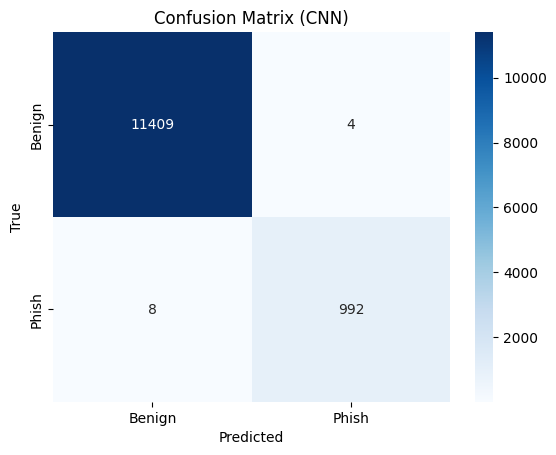

In [13]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Phish'], yticklabels=['Benign', 'Phish'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (CNN)")
plt.show()

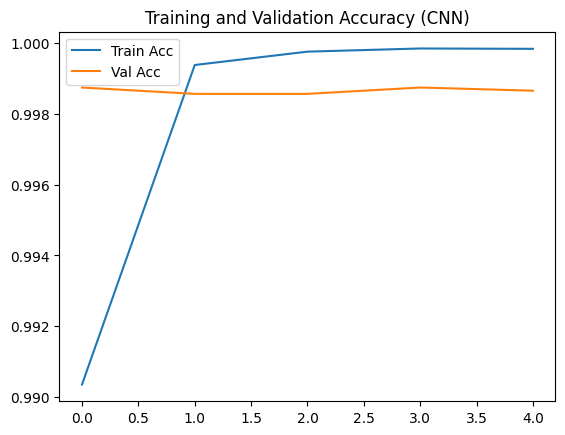

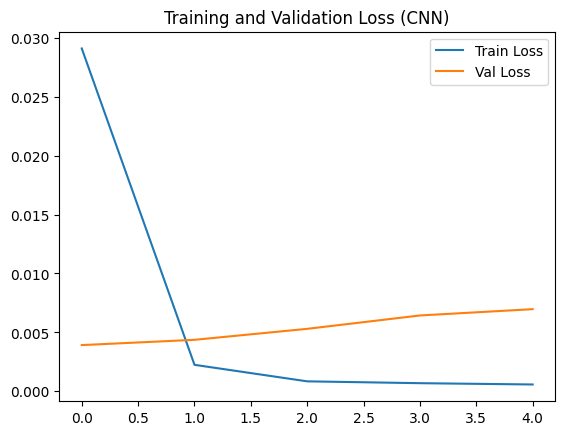

In [14]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training and Validation Accuracy (CNN)')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss (CNN)')
plt.legend()
plt.show()

In [15]:
from tensorflow.keras.layers import LSTM

model_cnn_lstm = tf.keras.Sequential([
    Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    tf.keras.layers.Reshape((1, 128)),
    LSTM(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_cnn_lstm.compile(loss='binary_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])

model_cnn_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
history_cnn_lstm = model_cnn_lstm.fit(
    X_train, y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.1,
    verbose=1
)

Epoch 1/5
786/786 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.9699 - loss: 0.1057 - val_accuracy: 0.9985 - val_loss: 0.0038
Epoch 2/5
786/786 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9983 - val_loss: 0.0049
Epoch 3/5
786/786 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9998 - loss: 8.0682e-04 - val_accuracy: 0.9988 - val_loss: 0.0042
Epoch 4/5
786/786 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9998 - loss: 7.8286e-04 - val_accuracy: 0.9987 - val_loss: 0.0069
Epoch 5/5
786/786 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9989 - val_loss: 0.0044


In [17]:
y_pred_prob_cnn_lstm = model_cnn_lstm.predict(X_test)
y_pred_cnn_lstm = (y_pred_prob_cnn_lstm >= 0.5).astype(int)

388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [18]:
print("Classification Report (CNN + LSTM):\n")
print(classification_report(y_test, y_pred_cnn_lstm, digits=4))

Classification Report (CNN + LSTM):

              precision    recall  f1-score   support

           0     0.9995    0.9996    0.9996     11413
           1     0.9960    0.9940    0.9950      1000

    accuracy                         0.9992     12413
   macro avg     0.9977    0.9968    0.9973     12413
weighted avg     0.9992    0.9992    0.9992     12413



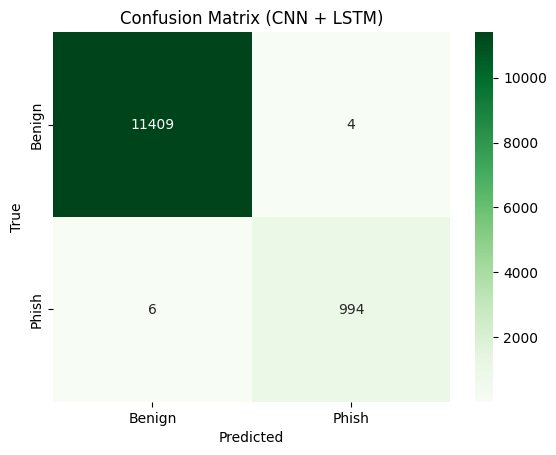

In [19]:
cm = confusion_matrix(y_test, y_pred_cnn_lstm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Benign', 'Phish'], yticklabels=['Benign', 'Phish'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (CNN + LSTM)")
plt.show()

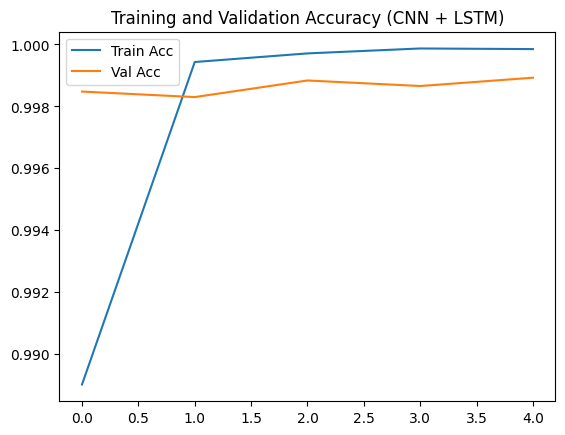

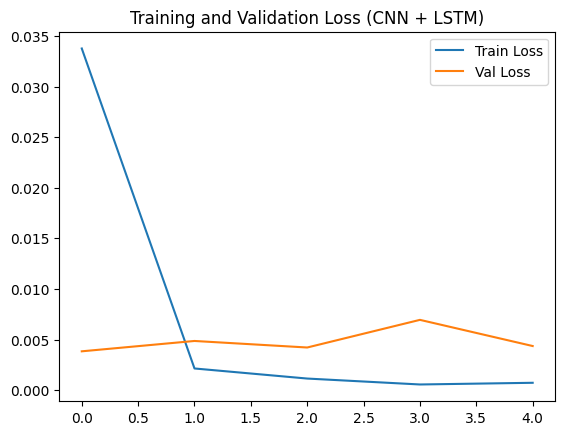

In [20]:
plt.plot(history_cnn_lstm.history['accuracy'], label='Train Acc')
plt.plot(history_cnn_lstm.history['val_accuracy'], label='Val Acc')
plt.title('Training and Validation Accuracy (CNN + LSTM)')
plt.legend()
plt.show()

plt.plot(history_cnn_lstm.history['loss'], label='Train Loss')
plt.plot(history_cnn_lstm.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss (CNN + LSTM)')
plt.legend()
plt.show()

In [21]:
!pip install transformers

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import torch
from torch.utils.data import Dataset, DataLoader

from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

In [23]:
df = pd.read_csv('/content/combined_featured_dataset.csv')
df = df[['Clean_Message', 'label']].dropna()
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

texts = df['Clean_Message'].tolist()
labels = df['label'].tolist()

In [24]:
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.1, stratify=labels, random_state=42
)

In [25]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [33]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

In [34]:
class EmailDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = EmailDataset(train_encodings, train_labels)
test_dataset = EmailDataset(test_encodings, test_labels)

In [35]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
)

In [37]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

In [38]:
trainer.train()

Step,Training Loss
100,0.299700
200,0.033600
300,0.018000
400,0.022300
500,0.017800
600,0.019900
700,0.010200
800,0.030600
900,0.018500
1000,0.026900


TrainOutput(global_step=6981, training_loss=0.013518828483968931, metrics={'train_runtime': 8197.6305, 'train_samples_per_second': 13.624, 'train_steps_per_second': 0.852, 'total_flos': 7346323776706560.0, 'train_loss': 0.013518828483968931, 'epoch': 1.0})

In [39]:
preds_output = trainer.predict(test_dataset)
preds = np.argmax(preds_output.predictions, axis=1)

In [40]:
print("Classification Report (BERT):\n")
print(classification_report(test_labels, preds, digits=4))

Classification Report (BERT):

              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     11410
           1     0.9970    0.9970    0.9970      1000

    accuracy                         0.9995     12410
   macro avg     0.9984    0.9984    0.9984     12410
weighted avg     0.9995    0.9995    0.9995     12410



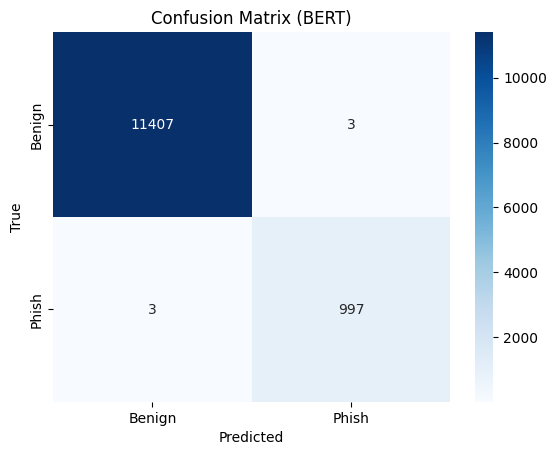

In [41]:
cm = confusion_matrix(test_labels, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Phish'], yticklabels=['Benign', 'Phish'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (BERT)")
plt.show()

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


cnn_acc = accuracy_score(y_test, y_pred)
cnn_prec = precision_score(y_test, y_pred)
cnn_rec = recall_score(y_test, y_pred)
cnn_f1 = f1_score(y_test, y_pred)

cnn_lstm_acc = accuracy_score(y_test, y_pred_cnn_lstm)
cnn_lstm_prec = precision_score(y_test, y_pred_cnn_lstm)
cnn_lstm_rec = recall_score(y_test, y_pred_cnn_lstm)
cnn_lstm_f1 = f1_score(y_test, y_pred_cnn_lstm)

bert_acc = accuracy_score(test_labels, preds)
bert_prec = precision_score(test_labels, preds)
bert_rec = recall_score(test_labels, preds)
bert_f1 = f1_score(test_labels, preds)

In [43]:
import pandas as pd

data = {
    "Model": ["CNN", "CNN + LSTM", "BERT"],
    "Accuracy": [cnn_acc, cnn_lstm_acc, bert_acc],
    "Precision": [cnn_prec, cnn_lstm_prec, bert_prec],
    "Recall": [cnn_rec, cnn_lstm_rec, bert_rec],
    "F1-score": [cnn_f1, cnn_lstm_f1, bert_f1],
}

df_metrics = pd.DataFrame(data)

In [44]:
df_metrics = df_metrics.round(4)
df_metrics

,Model,Accuracy,Precision,Recall,F1-score
0,CNN,0.9990,0.996,0.992,0.994
1,CNN + LSTM,0.9992,0.996,0.994,0.995
2,BERT,0.9995,0.997,0.997,0.997
